## Demo for microscope characterization

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
#main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


#### Load PSF model file from bead data

In [9]:
resfile = r'Y:\Projects\DOE Raman HSM\Data\Obj_Test_Microscope\psfmodel_zernike_vector_single.h5'
#resfile = r'C:\Users\Sheng\Documents\MATLAB\HSM Raman\09-23-2024 nikon 25x\psfmodel_pupil_vector_single.h5'
#resfile  = r'T:\projects\smart-microscope\data\psfstack\07-28-2024 tirf_60x\psfmodel_zernike_vector_single.h5'
f,p = io.h5.load(resfile) # load result file
L = psflearninglib()
L.param = p

#### Display system characterizations


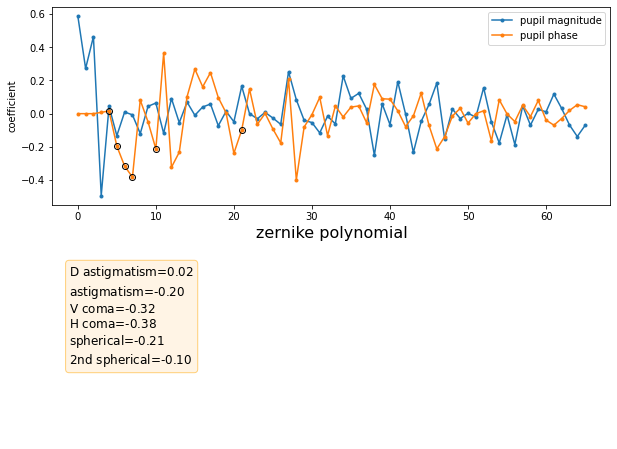

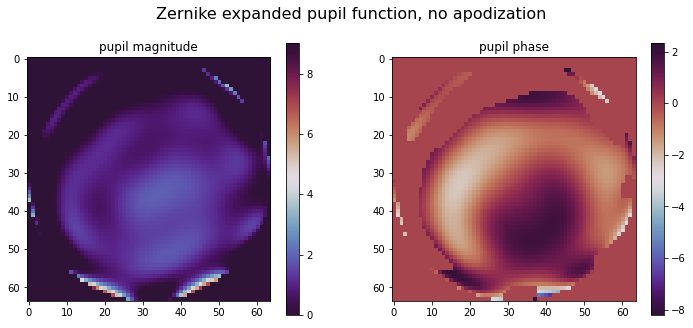

In [10]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

In [11]:
strehlratio = L.calstrehlratio(f)

Strehl ratio:  0.1931847


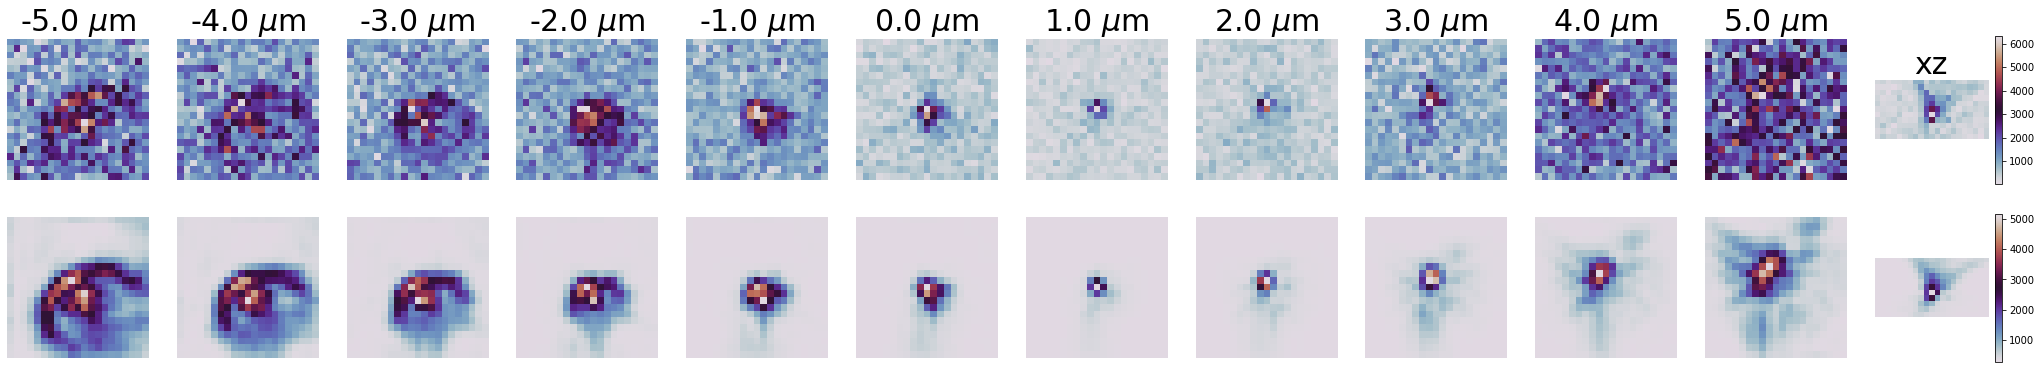

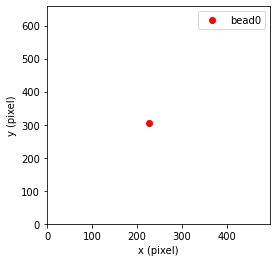

In [12]:
if 'insitu' in p.PSFtype:
    showpsfvsdata_insitu(f,p)
else:
    showpsfvsdata(f,p,index=0,step=1)

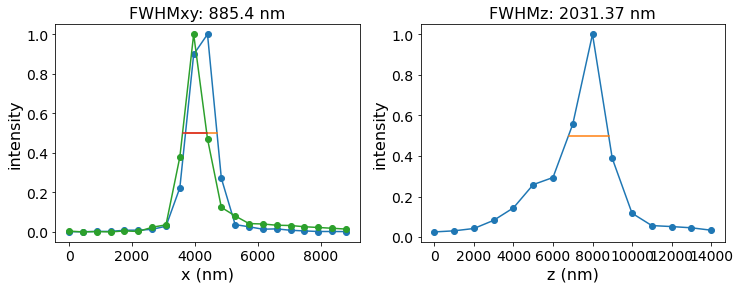

In [13]:
try:
    fwhmx,fwhmy,fwhmz = L.calfwhm(f)
except:
    print('fwhm not found')